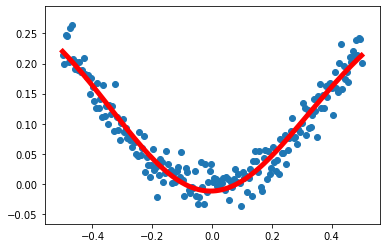

In [27]:
import numpy as np
import tensorflow as tf;
import matplotlib.pylab as plt;

# 使用np生成随机点
# np.newaxis 必须在np生成的数据上使用，增加一个维度
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
# 增加噪点
# np生成的数据可以使用x_data.shape查看当前数据的维度
noise = np.random.normal(0,0.02,x_data.shape)

# np使用np.square可以求出数据的平方
y_data = np.square(x_data) + noise

# 定义 placeholder
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

# 构建神经网络 1-10-1的神经网络
# L1的权重值，应为输入层是1个神经元，那么需要权重值W1一个1*10的矩阵
Weights_L1 = tf.Variable(tf.random_normal([1,10]))
# 定义偏置值也就是机器学习中的a0或者这里是输入层也可以说是x0
biases_L1= tf.Variable(tf.zeros([1,10]))
#计算中间层L1的数据，通过矩阵乘法计算
Wx_plus_b_L1 = tf.matmul(x,Weights_L1) + biases_L1;

L1 = tf.tanh(Wx_plus_b_L1)

# 定义神经网络输出层
# L2的权重值，应为输出1个神经元，那么需要权重值W2一个10*1的矩阵
Weights_L2 = tf.Variable(tf.random_normal([10,1]))
# 定义偏置值也就是机器学习中的a0，因为这里只有一个输出单元，所以a0值对应一个值
biases_L2= tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1,Weights_L2) + biases_L2;
prediction = tf.tanh(Wx_plus_b_L2)

# 代价函数
# tf.reduce_mean 是降维度的函数，在没有指定参数的情况下，取矩阵所以值求和算平均值
loss = tf.reduce_mean(tf.square(y-prediction))
# 使用梯度下降
tran_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(2000):
        sess.run(tran_step,feed_dict={x:x_data,y:y_data} )
        
#     获得预测值
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
#     画图展示
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,"r-",lw=5)
